<a href="https://colab.research.google.com/github/keylorac/LQCD/blob/main/LQCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#                                              **QCD+QED**


>


Universidad de Costa Rica


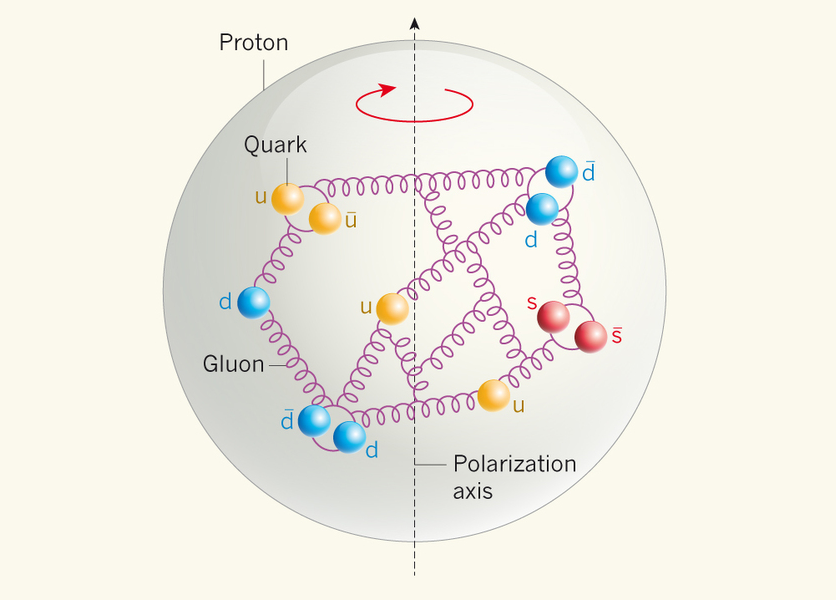


---


**INSTALACIÓN BIBLIOTECAS NECESARIAS / INSTALLING REQUIRED PACKAGES**

---




In [ ]:
!pip install gvar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 7.6 MB/s 
  Created wheel for gvar: filename=gvar-11.10-cp37-cp37m-linux_x86_64.whl size=4090301 sha256=1f5320729f22f53a0fbada9d536e6b5ff6ec733d9e80f1219b62f25c0d338e8d
  Stored in directory: /root/.cache/pip/wheels/2b/0c/4d/122d1fd5d45e84493707cbaf96ea342a9d18a166a80b4d0a26
Successfully built gvar


In [ ]:
!pip install lsqfit==11.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 7.6 MB/s 
  Created wheel for lsqfit: filename=lsqfit-11.5.3-cp37-cp37m-linux_x86_64.whl size=384854 sha256=302e954b0cf1b7aea1ab08e404c95d17d6233e96e9df4f7493c04d5c0a173032
  Stored in directory: /root/.cache/pip/wheels/6e/6e/08/53e4966f2dc4e1b95346662e094888d34650e68f35762e1489
Successfully built lsqfit


In [ ]:
!apt-get install hdf5-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  hdf5-tools
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 390 kB of archives.
After this operation, 2,280 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 hdf5-tools amd64 1.10.0-patch1+docs-4 [390 kB]
Fetched 390 kB in 1s (401 kB/s)
Selecting previously unselected package hdf5-tools.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../hdf5-tools_1.10.0-patch1+docs-4_amd64.deb ...
Unpacking hdf5-tools (1.10.0-patch1+docs-4) ...
Setting up hdf5-tools (1.10.0-patch1+docs-4) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!h5ls /content/drive/MyDrive/Colab Notebooks/callat_a12m220XL_test.h5


/content/drive/MyDrive/Colab: unable to open file
Notebooks/callat_a12m220XL_test.h5: unable to open file




---


**AJUSTE DE EJEMPLO - USO DE LSQFIT / EXAMPLE OF LSQFIT**

---





# Generalidades
En general un ajuste tiene 4 entradas:


> 1. La variable dependiente *y* la cuál será ajustada. Sus valores son gvar.Gvars o arrays (cualquier forma o dimensión) de gvar.GvarS los cuáles especifican los valores de las variables dependientes y su error.
> 2. Datos independientes *x*  que pueden tener cualquier estructura y contener cualquier dato, o incluso omitirse.
> 3. Una función de ajuste *f(x,p)* cuyos parámetros *p* son ajustados por el ajustador hasta que *f(x,p)* iguale a *y* dentro de los errores de *y*. Los parámetros *p* son usualmente especificados en un diccionario cuyos valores *p[k]* son parámetros individuales o numpy arrays de parámetros. La función de ajuste es asumida como independiente de *x* (osea, f(p)) siempre y cuando *x=false* o si *x* se omite de los datos iniciales.
> 4. Estimaciones iniciales o *priors* para cada parámetro en *p*. Los *priors* son usualmente especificados usando un diccionario al que llamamos *prior* cuyo valor *prior [k]* son gvar.GvarS o arrays de gvar.GVarS que dan estimaciones iniciales (valores o errores) para parámetros *p[k]*

El módulo lsqfit fue diseñado para elaborar ajustes de mínimos cuadrados de datos con ruido y funciones no lineales de muchos parámetros arbitrarios, cada uno con un bayesiano previo.

El lsqfit hace uso fuerte de otro módulo, *gvar* (distribución separada), que brinda herramientas que simplifican el análisis de propagación de error y también la creación de distribuciones gaussianas multi dimensionales complicadas. El *gvar* también permite al lsqfit calcular derivadas exactas de funciones de ajuste usando diferenciación automática, sin necesidad de codificar estas (el ajustador usa las derivadas).

------------------------------------------------

# Principles
In general, there are 4 inputs used in *lsqfit*:

> 1. The dependent *y* variable, which is to be adjusted. Its values are gvar.Gvars or arrays (any form or dimension) of gvar.GvarS which specified values of the independent variables and its error.
> 2. Independent data *x* which can be any structure or contain any value. It can also be omitted.
> 3. An adjustment function *f(x,p)* whose parameters *p* are adjusted by the fit until *f(x,p)* is equal to *a* within the *y* errors. *p* parameters are usually specified in a dictionary whose values *p[k]* are individuals parameters or numpy arrays of parameters. The adjusment function is assumed as independet of *x* (this is, *f(p)*) only when *x=false* or if *x* is omitted from initial data.
> 4. Priors for each *p* parameter. *priors* are usually specified using a dictionary which is called *prior* whose value *prior [k]* are gvar.GvarS or arrays of gvar.GvarS which give initial estimations (values or errors) for parameters *p[k]*

Lsqfit module was designed to process square minimun adjusments of noisy data and non linear functions of many arbitrary parameters, each one with its previous-bayesian.

Lsqfit constantly use other module, *gvar* (separate distribution), which gives simplification tools for the error propagation error and also creates some complicated multi-dismension gaussian distributions. *gvar* also allows *lsqfit* calculate fit function's exact derivates using automatic differentiation whithout coding them (fitter uses derivates).


In [ ]:
import numpy as np
import gvar as gv
import lsqfit

y = {                                 # data for the dependent variable
   'data1' : gv.gvar([1.376, 2.010], [[ 0.0047, 0.01], [ 0.01, 0.056]]),
   'data2' : gv.gvar([1.329, 1.582], [[ 0.0047, 0.0067], [0.0067, 0.0136]]),
   'b/a'   : gv.gvar(2.0, 0.5)
   }
x = {                                 # independent variable
   'data1' : np.array([0.1, 1.0]),
   'data2' : np.array([0.1, 0.5])
   }
prior = {}
prior['a'] = gv.gvar(0.5, 0.5)
prior['b'] = gv.gvar(0.5, 0.5)

def fcn(x, p):                        # fit function of x and parameters p
  ans = {}
  for k in ['data1', 'data2']:
     ans[k] = gv.exp(p['a'] + x[k] * p['b'])
  ans['b/a'] = p['b'] / p['a']
  return ans

# do the fit
fit = lsqfit.nonlinear_fit(data=(x, y), prior=prior, fcn=fcn, debug=True)
print(fit.format(maxline=True))       # print standard summary of fit

p = fit.p                             # best-fit values for parameters
outputs = dict(a=p['a'], b=p['b'])
outputs['b/a'] = p['b']/p['a']
inputs = dict(y=y, prior=prior)
print(gv.fmt_values(outputs))              # tabulate outputs
print(gv.fmt_errorbudget(outputs, inputs)) # print error budget for outputs

---


**ESTUDIO DEL CÓDIGO / CODE ANALYSIS**

---

In [ ]:
import numpy as np
import gvar as gv
import h5py as h5
import matplotlib.pyplot as plt
import lsqfit

y = {                                 # Datos de la variable dependiente (sobre los que se hace el ajuste)
   'datos1' : gv.gvar([1.376, 2.010], [[ 0.0047, 0.01], [ 0.01, 0.056]]),
   'datos2' : gv.gvar([1.329, 1.582], [[ 0.0047, 0.0067], [0.0067, 0.0136]]),
   'b/a'   : gv.gvar(2.0, 0.5)
   }
x = {                                 # Datos de la variable independiente (puede ser cualquier conjunto de datos mientra sea uno a uno con la variable dependiente)
   'datos1' : np.array([0.1, 1.0]),
   'datos2' : np.array([0.1, 0.5])
   }

valorpreliminar = {} #inicializa las estimaciones iniciales priors
valorpreliminar['a'] = gv.gvar(0.5, 0.5) #prior a
valorpreliminar['b'] = gv.gvar(0.5, 0.5) #prior b

def funcion(x, p):                        # función de ajuste de x y parámetros p
  respuesta = {}
  for k in ['datos1', 'datos2']:
     respuesta[k] = gv.exp(p['a'] + x[k] * p['b']) #ojo!!! respuesta es un diccionario y los valores iniciales son usados acá
  respuesta['b/a'] = p['b'] / p['a']
  return respuesta

# Hacer el ajuste
ajuste = lsqfit.nonlinear_fit(data=(x, y), prior=valorpreliminar, fcn=funcion, debug=True)
print(ajuste.format(maxline=True))       # Al imprimir fit nos arroja un resumen del ajuste hecho a los datos data=(x, y)

p = ajuste.p                          # fit.p toma los mejores valores para los parámetros a y b
salidas = dict(a=p['a'], b=p['b'])    # ahora almacenamos el valor preliminar de a y b en nuevas variables a y b (que son los parámetros que varían) en un diccionario llamado salida
salidas['b/a'] = p['b']/p['a']        # recalculamos la razón de los parámetros a y b una vez hayan variado
entradas = dict(y=y, valorpreliminar=valorpreliminar)  #la entrada será el diccionario con valor y
print(gv.fmt_values(salidas))           # tabulamos el diccionario de salida
print(gv.fmt_errorbudget(salidas, entradas)) # imprimimos el error en la predicción para las salidas


---


**AJUSTE DE EJEMPLO APLICADO A LQCD / LQCD FIT EXAMPLE**

---

In [ ]:
import numpy as np
import gvar as gv
import h5py as h5
import matplotlib.pyplot as plt
import lsqfit


def main():
    x, y = make_data()              # collect fit data
    p0 = None                       # make larger fits go faster (opt.)
    for nexp in range(1, 7):
        print('************************************* nexp =', nexp)
        prior = make_prior(nexp)
        fit = lsqfit.nonlinear_fit(data=(x, y), fcn=f, prior=prior, p0=p0)
        print(fit)                  # print the fit results
        if nexp > 2:
            E = fit.p['E']          # best-fit parameters
            a = fit.p['a']
            print('E1/E0 =', E[1] / E[0], '  E2/E0 =', E[2] / E[0])
            print('a1/a0 =', a[1] / a[0], '  a2/a0 =', a[2] / a[0])
        if fit.chi2 / fit.dof < 1.:
            p0 = fit.pmean          # starting point for next fit (opt.)
        print()

    # error budget analysis
    outputs = {
        'E1/E0':E[1]/E[0], 'E2/E0':E[2]/E[0],
        'a1/a0':a[1]/a[0], 'a2/a0':a[2]/a[0]
        }
    inputs = {'E':fit.prior['E'], 'a':fit.prior['a'], 'y':y}
    print('================= Error Budget Analysis')
    print(gv.fmt_values(outputs))
    print(gv.fmt_errorbudget(outputs,inputs))

def f(x, p):                        # function used to fit x, y data
    a = p['a']                      # array of a[i]s
    E = p['E']                      # array of E[i]s
    return sum(ai * np.exp(-Ei * x) for ai, Ei in zip(a, E))

def make_prior(nexp):               # make priors for fit parameters
    prior = gv.BufferDict()         # any dictionary works
    prior['a'] = [gv.gvar(0.5, 0.4) for i in range(nexp)]
    prior['E'] = [gv.gvar(i+1, 0.4) for i in range(nexp)]
    return prior

def make_data():                     # assemble fit data
   x = np.array([  5.,   6.,   7.,   8.,   9.,  10.,  12.,  14.])
   ymean = np.array(
       [  4.5022829417e-03,   1.8170543788e-03,   7.3618847843e-04,
          2.9872730036e-04,   1.2128831367e-04,   4.9256559129e-05,
          8.1263644483e-06,   1.3415253536e-06]
       )
   ycov = np.array(
       [[ 2.1537808808e-09,   8.8161794696e-10,   3.6237356558e-10,
          1.4921344875e-10,   6.1492842463e-11,   2.5353714617e-11,
          4.3137593878e-12,   7.3465498888e-13],
       [  8.8161794696e-10,   3.6193461816e-10,   1.4921610813e-10,
          6.1633547703e-11,   2.5481570082e-11,   1.0540958082e-11,
          1.8059692534e-12,   3.0985581496e-13],
       [  3.6237356558e-10,   1.4921610813e-10,   6.1710468826e-11,
          2.5572230776e-11,   1.0608148954e-11,   4.4036448945e-12,
          7.6008881270e-13,   1.3146405310e-13],
       [  1.4921344875e-10,   6.1633547703e-11,   2.5572230776e-11,
          1.0632830128e-11,   4.4264622187e-12,   1.8443245513e-12,
          3.2087725578e-13,   5.5986403288e-14],
       [  6.1492842463e-11,   2.5481570082e-11,   1.0608148954e-11,
          4.4264622187e-12,   1.8496194125e-12,   7.7369196122e-13,
          1.3576009069e-13,   2.3914810594e-14],
       [  2.5353714617e-11,   1.0540958082e-11,   4.4036448945e-12,
          1.8443245513e-12,   7.7369196122e-13,   3.2498644263e-13,
          5.7551104112e-14,   1.0244738582e-14],
       [  4.3137593878e-12,   1.8059692534e-12,   7.6008881270e-13,
          3.2087725578e-13,   1.3576009069e-13,   5.7551104112e-14,
          1.0403917951e-14,   1.8976295583e-15],
       [  7.3465498888e-13,   3.0985581496e-13,   1.3146405310e-13,
          5.5986403288e-14,   2.3914810594e-14,   1.0244738582e-14,
          1.8976295583e-15,   3.5672355835e-16]]
       )
   return x, gv.gvar(ymean, ycov)

if __name__ == '__main__':
    main()

---


**ESTUDIO DEL CÓDIGO / CODE ANALYSIS**

---

# Importante destacar
Este formato de ajuste posee algunos cambios en cuanto a su estructura (implementación de funciones) y además el estudio por exponenciales aumentando en su número hasta encontrar el mejor grado de aproximación. Se procede a hacer uso de comentarios a modo de explicación.

Los parámetros de p[k] son variados hasta que chi2 es mínimo para el ajuste.

----------------------------------

# Important to highlight

This fit format has some infraestructure changes (functions implementations) and also the study by exponentials increasing its number until find the best approximation value. Following there are several explanation comments.

The fitter varies *p[k]* parameters until chi**2 in minimum (equal to 1) for the fit.



In [ ]:
import numpy as np
import gvar as gv
import h5py as h5
import matplotlib.pyplot as plt
import lsqfit


def principal():                    # Función principal donde se acuerpa el modelo del ajuste.
    x, y = crear_datos()            # Traemos los datos a usar para el ajuste. Importante ver que estamos usando la función "crear_datos" para designar el valor de "x" y de "y" como los valores etiquetados como "x" y "gv.gvar(ymean, ycov)" respectivamente que son retornados por la función "crear_datos".
    p0 = None                       # ¿Por qué p0= None? p0 representa los valores iniciales para el ajuste de parámetros en el ajuste. lsqfit.nonlinear_fit ajusta p0 para hacerlo consistente en forma y estructura a los prior. Si p0 es None o el intento por leer el archivo falla, los valores iniciales "p0" son extraídos de prior.Si p0 es True, este es reemplazado por un punto inicial random de la distribución de los priors. El valor por default es None. El valor de p0 debe ser explícitamente especificado si prior = None.
    for nexp in range(1, 7):        # Note que iniciamos un ciclo sobre nexp (la variable cuyo valor ascenderá hasta nexp 6, un valor antes de 7)
        print('************************************* nexp =', nexp) # Imprimimos dentro del ciclo un aviso de cuál valor para nexp se tiene en el ajuste respectivo.
        prior = crear_prior(nexp)   # ¿Qué sucede aquí? Pues definimos nuestros valores estimados iniciales a priori para todos los parámetros p usados por la función de ajuste. En este caso la función de ajuste se llama "funcion" y note que también se ha definido por aparte. Vea que prior se iguala a una función definida por fuera "crear_prior", de donde provienen los valores de las estimaciones iniciales (priors).
        fit = lsqfit.nonlinear_fit(data=(x, y), fcn=funcion, prior=prior, p0=p0)
        print(fit)                  # Acá imprimimos los valores del ajuste (los que son arrojados al llamar el módulo lsqfit.nonlinear_fit de la biblioteca lsqfit y evaluarle las estimaciones previas (priors) y darle una función la cual llamamos "funcion" en este caso y fue definida por aparte).
        if nexp > 2:                # Esta condición establece que si nexp tiene un valor mayor 2 entonces se definen las variables dadas abajo.
            E = fit.p['E']          # Arroja los mejores parámetros para E (1 valor para nexp = 1, 2 valores para nexp = 2, y así sucesivamente).
            a = fit.p['a']          # Arroja los mejores parámetros para a (1 valor para nexp = 1, 2 valores para nexp = 2, y así sucesivamente).
            print('E1/E0 =', E[1] / E[0], '  E2/E0 =', E[2] / E[0]) # Imprimimos los valores de la razón entre los valores de E arrojados por el modelo de ajuste).
            print('a1/a0 =', a[1] / a[0], '  a2/a0 =', a[2] / a[0]) # Imprimimos los valores de la razón entre los valores de a arrojados por el modelo de ajuste).
        if fit.chi2 / fit.dof < 1.: # fit.chi2 y fit.dof es donde se encuentra almacenado el valor de chi2 (promedio ponderado) y el valor dof (grados de libertad efectivos).
                                    # La razón fit.chi2 / fit.dof es usualmente de orden 1 en un buen ajuste.
                                    # Valores mucho menos que 1 sugieren que las fluctuaciones actuales en la entrada de los datos y/o los valores de estimación iniciales (priors) son muy pequeños para las desviaciones estándar (o covarianza) usada en el ajuste.
                                    # Q es el factor de calidad (o valor p) para el ajuste.
                                    # Q <= 0 sugiere que los datos no son gaussianos o son inconsistentes entre ellos.
                                    # Los parámetros p[k] varían hasta que chi**2 sea tienda a 1 (mejor ajuste).
            p0 = fit.pmean          # Este es el punto de partida para el próximo ajuste.
        print()

    # Análisis de error
    salidas = {
        'E1/E0':E[1]/E[0], 'E2/E0':E[2]/E[0],
        'a1/a0':a[1]/a[0], 'a2/a0':a[2]/a[0]
        }
    entradas = {'E':fit.prior['E'], 'a':fit.prior['a'], 'y':y}
    print('================= Análisis de error')
    print(gv.fmt_values(salidas))
    print(gv.fmt_errorbudget(salidas,entradas))

def funcion(x, p):                  # Esta es la función definida para hacer el ajuste de los datos "y".
    a = p['a']                      # array del valor a[iésimo].
    E = p['E']                      # array del valor E[iésimo].
    return sum(ai * np.exp(-Ei * x) for ai, Ei in zip(a, E)) # Note que la función retorna una suma como fucnión de correlación.

def crear_prior(nexp):              # Esta función que se ha definido aquí es la que crea los parámetros para el ajuste
    prior = gv.BufferDict()         # Inicializa un diccionario de tipo gv
    prior['a'] = [gv.gvar(0.5, 0.4) for i in range(nexp)] # Note que se establece un valor prior para a
    prior['E'] = [gv.gvar(i+1, 0.4) for i in range(nexp)] # Note que se establece también un valor prior para E
    return prior

def crear_datos():                     # Se define una función para los datos de tipo gvar
   x = np.array([  5.,   6.,   7.,   8.,   9.,  10.,  12.,  14.]) # Se hace un numpy array de 8 valores indepentiendes.
   ymean = np.array(
       [  4.5022829417e-03,   1.8170543788e-03,   7.3618847843e-04,
          2.9872730036e-04,   1.2128831367e-04,   4.9256559129e-05,
          8.1263644483e-06,   1.3415253536e-06]
       )                               # Note que se hace otro numpy array de 8 valores dependientes del valor medio de "y".
   ycov = np.array(
       [[ 2.1537808808e-09,   8.8161794696e-10,   3.6237356558e-10,
          1.4921344875e-10,   6.1492842463e-11,   2.5353714617e-11,
          4.3137593878e-12,   7.3465498888e-13],
       [  8.8161794696e-10,   3.6193461816e-10,   1.4921610813e-10,
          6.1633547703e-11,   2.5481570082e-11,   1.0540958082e-11,
          1.8059692534e-12,   3.0985581496e-13],
       [  3.6237356558e-10,   1.4921610813e-10,   6.1710468826e-11,
          2.5572230776e-11,   1.0608148954e-11,   4.4036448945e-12,
          7.6008881270e-13,   1.3146405310e-13],
       [  1.4921344875e-10,   6.1633547703e-11,   2.5572230776e-11,
          1.0632830128e-11,   4.4264622187e-12,   1.8443245513e-12,
          3.2087725578e-13,   5.5986403288e-14],
       [  6.1492842463e-11,   2.5481570082e-11,   1.0608148954e-11,
          4.4264622187e-12,   1.8496194125e-12,   7.7369196122e-13,
          1.3576009069e-13,   2.3914810594e-14],
       [  2.5353714617e-11,   1.0540958082e-11,   4.4036448945e-12,
          1.8443245513e-12,   7.7369196122e-13,   3.2498644263e-13,
          5.7551104112e-14,   1.0244738582e-14],
       [  4.3137593878e-12,   1.8059692534e-12,   7.6008881270e-13,
          3.2087725578e-13,   1.3576009069e-13,   5.7551104112e-14,
          1.0403917951e-14,   1.8976295583e-15],
       [  7.3465498888e-13,   3.0985581496e-13,   1.3146405310e-13,
          5.5986403288e-14,   2.3914810594e-14,   1.0244738582e-14,
          1.8976295583e-15,   3.5672355835e-16]]
       )                              # Note que se hace otro numpy array de 8 valores dependientes encapsulados entre paréntesis cuadrados que a su vez tienen 8 valores de la covarianza.
   return x, gv.gvar(ymean, ycov)     # OJO!!! Muy importante, la función "crear_datos" retorna sólo dos valores en un par ordenado, las x y los valores de la media y covarianza de "y" en un archivo gvar.

if __name__ == '__principal__':
   principal()

---


**AJUSTE BRINDADO POR EL PROFESOR PARA NAVEGAR EN EL ARCHIVO Y REALIZAR PLOTEO / FIT SHARED BY THE PROFESSOR TO NAVIGATE IN THE FILE AND TO CREATE PLOTS**

---


In [ ]:
import numpy as np
import gvar as gv
import h5py as h5
import matplotlib.pyplot as plt
import lsqfit

dataFile = '/content/drive/MyDrive/Colab Notebooks/fixedData.h5'
with h5.File(dataFile, 'r') as f: # open file
  #data=f['DeltaZero/conf1/re'][()] #DeltaZero's route
  #data=f['/KPlus/conf26/re'][()]#Messon's route
  data=f['/Proton/conf13/re'][()]#Proton's route


  plt.errorbar(np.arange(30), data[:,0:30,0,0].mean(axis=0), yerr=data[:,0:30,0,0].std(axis=0), elinewidth=3) #30=time
  ydelta = data[:,:,0,0]#Y values from dataFrame with nt=10
  print('y values = ', ydelta)#Y values printed
  #ydelta_pj = np.roll(ydelta,-j,axis=0) (Professor's code)
  ydelta_pj = np.roll(ydelta,-2,axis=1) #With j=1 for shifting the array (j must be an user input) (Modified code)
  print('y shifted values = ', ydelta_pj)#Y shifted values printed
  #eff = ( 1 / float(j)) * np.ma.log( ydelta / ydelta_pj ) (Professor's code)
  meff = ( 1 / float(2)) * np.ma.log( ydelta / ydelta_pj)[:,0:30] #Effective mass definition (Modified code)
  print('effective mass = ', meff)
  #ax.errorbar(np.arange(nt),data[c].mean(axis=0), yerr=data[c].std(axis=0),marker='o',color=mycolors[k+1],ms=ms,mew=mew,
            #mfc='None',capsize=capsize,linestyle='None',alpha=0.9,label=str(k)) #(Professor's code)
  fig, ax = plt.subplots()
  ax.errorbar(np.arange(30),meff.mean(axis=0), yerr=meff.std(axis=0),marker='o',color= 'r',ms=4,mew=4,
            mfc='None',capsize=4,linestyle='None',alpha=0.9,label=('Proton')) #(Modified code) nbhu8u
                                                                              #colors = ['red', 'green', 'blue', 'cyan', 'magenta']

  print("Error values of y axis = ",'yerr', meff.std(axis=0))
  #t will be an arrangment of x quantity of times
  #defines fit which is the equation 6.54 #



  y = {                                 # Datos de la variable dependiente (sobre los que se hace el ajuste)
    'data1' : gv.gvar([1.376, 2.010], [[ 0.0047, 0.01], [ 0.01, 0.056]]),
    'data2' : gv.gvar([1.329, 1.582], [[ 0.0047, 0.0067], [0.0067, 0.0136]]),
    'b0/a0'   : gv.gvar(2.0, 0.5)
    }
  x = {                                 # Datos de la variable independiente (puede ser cualquier conjunto de datos mientra sea uno a uno con la variable dependiente)
    'data1' : np.array([0.1, 1.0]),
    'data2' : np.array([0.1, 0.5])
    }



  p = {'a0': gv.gvar(1,0.1), 'b0':gv.gvar(1,0.1), 'a1':gv.gvar(1,0.1), 'b1':gv.gvar(1,0.1)} #Parameters dictionary which system uses to begin a search
  def fcn(t,p):                        # fit function of x and parameters p
    ans = {}
    for k in ['data1', 'data2']:

      ans[k] = p['a0']*gv.exp( - t[k] * p['b0'])+ p['a1']*gv.exp( + t[k] * p['b1'])

    ans['b0/a0'] = p['b0'] / p['a0']
    return ans
# do the fit
  fit = lsqfit.nonlinear_fit(data=(x, y), prior=p, fcn=fcn, debug=True)
  print(fit.format(maxline=True))       # print standard summary of fit
  print(fit.p)
  p = fit.p
                              # best-fit values for parameters
  outputs = dict(a=p['a0'], b=p['b0'])
  outputs['b0/a0'] = p['b0']/p['a0']
  inputs = dict(y=y, prior=p)
  print(gv.fmt_values(outputs))              # tabulate outputs
  print(gv.fmt_errorbudget(outputs, inputs)) # print error budget for outputs

In [ ]:
  t={'data1':np.arange(10), 'data2':np.arange(10)}
  print('function', fcn(t,p))

---

C(nt) = A0 e−nt E0 + A1 e−nt E1 (función correlación / correlation function)

---



In [ ]:
print(data)


---


**AJUSTE PARA OBTENER ANÁLISIS DEL CONJUNTO DE DATOS DEL ARCHIVO / FIT TO OBTAIN AN ANALYS OF DATA ASSEMBLE FROM THE FILE**

---

In [ ]:
import numpy as np
import gvar as gv
import h5py as h5
import matplotlib.pyplot as plt
import lsqfit


with h5.File('/content/drive/MyDrive/Colab Notebooks/fixedData.h5', 'r') as f: # open file
  #data=f['DeltaZero/conf1/re'][()]
  #data=f['/KPlus/conf26/re'][()]#Messon's route
  data=f['/Proton/conf13/re'][()]#Proton's route
  print('Data from this file is: \n', data)
  print('DataType from this file is: \n', data.dtype)
  plt.errorbar(np.arange(0,30),data[:,0:30,0,0].mean(axis=0),yerr=data[:,0:30,0,0].std(axis=0), elinewidth=3) #30=time
  ydelta = data[:,:,0,0]#Y values from dataFrame with nt=10
  print('y values = ', ydelta)#Y values printed
  #ydelta_pj = np.roll(ydelta,-j,axis=0) (Professor's code)
  ydelta_pj = np.roll(ydelta,-2,axis=1) #With j=1 for shifting the array (j must be an user input) (Modified code)
  print('y shifted values = ', ydelta_pj)#Y shifted values printed
  #meff = ( 1 / float(j)) * np.ma.log( ydelta / ydelta_pj ) (Professor's code)
  meff = ( 1 / float(2)) * np.ma.log( ydelta / ydelta_pj)[:,0:30] #Effective mass definition (Modified code)
  print('efective mass = ', meff)
  #ax.errorbar(np.arange(nt),data[c].mean(axis=0), yerr=data[c].std(axis=0),marker='o',color=mycolors[k+1],ms=ms,mew=mew,
            #mfc='None',capsize=capsize,linestyle='None',alpha=0.9,label=str(k)) #(Professor's code)
  fig, ax = plt.subplots()
  ax.errorbar(np.arange(30,),meff.mean(axis=0), yerr=meff.std(axis=0),marker='o',color= 'r',ms=4,mew=4,
            mfc='None',capsize=4,linestyle='None',alpha=0.9,label=('Proton')) #(Modified code)
                                                                              #colors = ['red', 'green', 'blue', 'cyan', 'magenta']

  print("error values of y axis = ",'yerr', meff.std(axis=0))
  #t will be an arrange of a quantity x of time
  #define fit that is the equation 6.54 of Gatringer book


def main():
    x, y = make_data()              # collect fit data
    p0 = None                       # make larger fits go faster (opt.)
    for nexp in range(1, 7):
        print('************************************* nexp =', nexp)
        prior = make_prior(nexp)
        fit = lsqfit.nonlinear_fit(data=(x, y), fcn=fcn, prior=prior, p0=p0)
        print(fit)                  # print the fit results
        if nexp > 2:
            E = fit.p['E']          # best-fit parameters
            a = fit.p['a']
            print('E1/E0 =', E[1] / E[0], '  E2/E0 =', E[2] / E[0])
            print('a1/a0 =', a[1] / a[0], '  a2/a0 =', a[2] / a[0])
        if fit.chi2 / fit.dof < 1.:
            p0 = fit.pmean          # starting point for next fit (opt.)
        print()

    # error budget analysis
    outputs = {
        'E1/E0':E[1]/E[0], 'E2/E0':E[2]/E[0],
        'a1/a0':a[1]/a[0], 'a2/a0':a[2]/a[0]
        }
    inputs = {'E':fit.prior['E'], 'a':fit.prior['a'], 'y':y}
    print('================= Error Budget Analysis')
    print(gv.fmt_values(outputs))
    print(gv.fmt_errorbudget(outputs,inputs))

def fcn(x, p):                    # function used to fit x, y data
    a = p['a']                    # array of a[i]s
    E = p['E']                    # array of E[i]s

    return sum(ai * np.exp(-Ei * x) for ai, Ei in zip(a, E))


def make_prior(nexp):               # make priors for fit parameters
    prior = gv.BufferDict()         # any dictionary works
    prior['a'] = [gv.gvar(0.5, 0.4) for i in range(nexp)]
    #prior['a'] = [gv.gvar(0.5, 0.4) for i in range(nexp)]
    prior['E'] = [gv.gvar(i+1, 0.4) for i in range(nexp)]
    return prior


def make_data():                     # assemble fit data
   x = np.array([  5.,   6.,   7.,   8.,   9.,  10.,  12.,  14.])
   ymean = np.array(
       [  4.5022829417e-03,   1.8170543788e-03,   7.3618847843e-04,
          2.9872730036e-04,   1.2128831367e-04,   4.9256559129e-05,
          8.1263644483e-06,   1.3415253536e-06]
       )
   ycov = np.array(
       [[ 2.1537808808e-09,   8.8161794696e-10,   3.6237356558e-10,
          1.4921344875e-10,   6.1492842463e-11,   2.5353714617e-11,
          4.3137593878e-12,   7.3465498888e-13],
       [  8.8161794696e-10,   3.6193461816e-10,   1.4921610813e-10,
          6.1633547703e-11,   2.5481570082e-11,   1.0540958082e-11,
          1.8059692534e-12,   3.0985581496e-13],
       [  3.6237356558e-10,   1.4921610813e-10,   6.1710468826e-11,
          2.5572230776e-11,   1.0608148954e-11,   4.4036448945e-12,
          7.6008881270e-13,   1.3146405310e-13],
       [  1.4921344875e-10,   6.1633547703e-11,   2.5572230776e-11,
          1.0632830128e-11,   4.4264622187e-12,   1.8443245513e-12,
          3.2087725578e-13,   5.5986403288e-14],
       [  6.1492842463e-11,   2.5481570082e-11,   1.0608148954e-11,
          4.4264622187e-12,   1.8496194125e-12,   7.7369196122e-13,
          1.3576009069e-13,   2.3914810594e-14],
       [  2.5353714617e-11,   1.0540958082e-11,   4.4036448945e-12,
          1.8443245513e-12,   7.7369196122e-13,   3.2498644263e-13,
          5.7551104112e-14,   1.0244738582e-14],
       [  4.3137593878e-12,   1.8059692534e-12,   7.6008881270e-13,
          3.2087725578e-13,   1.3576009069e-13,   5.7551104112e-14,
          1.0403917951e-14,   1.8976295583e-15],
       [  7.3465498888e-13,   3.0985581496e-13,   1.3146405310e-13,
          5.5986403288e-14,   2.3914810594e-14,   1.0244738582e-14,
          1.8976295583e-15,   3.5672355835e-16]]
       )
   return x, gv.gvar(ymean, ycov)

if __name__ == '__main__':
    main()



---


**CÓDIGO ELABORADO POR EL ESTUDIANTE PARA UNA APLICACIÓN DE ANÁLISIS LQCD / STUDENT CODE FOR AN LQCD ANALYSIS APP**

---


In [ ]:
import numpy as np
import gvar as gv
import h5py as h5
import matplotlib.pyplot as plt
import lsqfit


def Menu():     #Main menu
    print("LQCD APP")
    print("")
    print("Main menu")
    print("1. Visualize data from imported file.")
    print("2. Visualize values of y axis.")
    print("3. Visualize values of y axis with j displacement.")
    print("4. Visualize error for y values. ")
    print("5. Visuaize values of effective mass.")
    print("6. Visualize complete fit information through lsqfit.")
    print("7. Plot y values vs time t with error.")
    print("8. Plot values of effective mass error.")
    print("9. Save fit values.")
    print("10. Save plots.")
    print("")





def ydelta(j):

     ydelta = data[:,:,0,0]
     ydelta_pj = np.roll(ydelta,-j,axis=1) #With j=1 for shifting the array (j must be an user input) (Modified code)
     return ydelta_pj


def effectivemass(j,t):

    ydelta = data[:,:,0,0]
    ydelta_pj = np.roll(ydelta,-j,axis=1)
    meff = ( 1 / float(j)) * np.ma.log( ydelta / ydelta_pj)[:,0:t] #Effective mass definition (Modified code)
    return meff






continuar = True
Menu()
#ruta=input("Hola, acá puede copiar la ruta del archivo (.h5) que desea cargar. (ejemplo de una ruta válida: /content/drive/MyDrive/Colab Notebooks/fixedData.h5)\n")
#print("La ruta indicada es,", ruta)
with h5.File('/content/drive/MyDrive/Colab Notebooks/fixedData.h5', 'r') as f: # open file
  #data=f['DeltaZero/conf1/re'][()]
  #data=f['/KPlus/conf26/re'][()]#Messon's route
  data=f['/Proton/conf13/re'][()]#Proton's route
  #ruta2=input("Copie la ruta donde se encuentra la partícula que desea estudiar en el archivo (.h5). (ejemplo de ruta válida: /Proton/conf13/re)")
  #print("La ruta especificada dentro del archivo es: ", ruta2)
  #datos=f['ruta2'][()]

while start == True :
    correctType = False

    while correctType == False:
        try:
            option = int(input("Select an option (1, 2, 3, ... ): "))
            correctType = True
        except ValueError:
            print("Invalid option! Please type again.")
        except:
            print("An unknown error ocurred")

    if option == 1 : #1. Visualize imported data from file

        print('Valores de los datos importados = ', data)#data printed



    elif option == 2 : #2. Visualize values of y axis

        ydelta = data[:,:,0,0]#Y values from dataFrame with nt=10
        print('y values = ', ydelta)#Y values printed



    elif option == 3 : #3. Visualize values of axis y with a j displacement

        j = int(input("Type a time range of analysis (seconds): "))
        ydelta = ydelta(j)
        print("y values with a displacement of ", j, "are = ", ydelta)



    elif option == 4 : #4. Visualize error of y values

        yerr=data[:,0:20,0,0].std(axis=0)
        print("Values of y axis error = ",'yerr', meff.std(axis=0))



    elif option == 5 : #5. Visualize values of effective mass

        t = int(input("Type a time range of analysis (seconds): "))
        j = int(input("Type the displacement value: "))
        effectivemass = effectivemass(j,t)
        print("The effective mass of the system in the range of time", t, "is: ", effectivemass, "adimetional")



    elif option == 6 : #6. Visualize complete fit información through lsqfit

        #t will be an arrange of a quantity x of time
        #Define fit which is the equation 6.54 of the Gatringer book

        y = {                                 # data for the dependent variable
          'data1' : gv.gvar([1.376, 2.010], [[ 0.0047, 0.01], [ 0.01, 0.056]]),
          'data2' : gv.gvar([1.329, 1.582], [[ 0.0047, 0.0067], [0.0067, 0.0136]]),
          'b0/a0'   : gv.gvar(2.0, 0.5)
          }
        x = {                                 # independent variable
          'data1' : np.array([0.1, 1.0]),
          'data2' : np.array([0.1, 0.5])
          }



        p = {'a0': gv.gvar(1,0.1), 'b0':gv.gvar(1,0.1), 'a1':gv.gvar(1,0.1), 'b1':gv.gvar(1,0.1)} #Parameters dictionary which system uses to begin a search
        def fcn(t,p):                        # fit function of x and parameters p
          ans = {}
          for k in ['data1', 'data2']:

            ans[k] = p['a0']*gv.exp( - t[k] * p['b0'])+ p['a1']*gv.exp( + t[k] * p['b1'])

          ans['b0/a0'] = p['b0'] / p['a0']
          return ans

        # do the fit
        fit = lsqfit.nonlinear_fit(data=(x, y), prior=p, fcn=fcn, debug=True)
        print(fit.format(maxline=True))       # print standard summary of fit
        print(fit.p)
        p = fit.p
                                    # best-fit values for parameters
        outputs = dict(a=p['a0'], b=p['b0'])
        outputs['b0/a0'] = p['b0']/p['a0']
        inputs = dict(y=y, prior=p)
        print(gv.fmt_values(outputs))              # tabulate outputs
        print(gv.fmt_errorbudget(outputs, inputs)) # print error budget for outputs



    elif option == 7 : #7. Plot y values vs t values with error

        plt.errorbar(np.arange(20),data[:,0:20,0,0].mean(axis=0),yerr=data[:,0:20,0,0].std(axis=0), elinewidth=3)



    elif option == 8 : #8. Plot efective mass with error

        t = int(input("Type a range of time of the analysis (seconds): "))
        j = int(input("Type the displacement value: "))
        effectivemass = effectivemass(j,t)
        fig, ax = plt.subplots()
        ax.errorbar(np.arange(t),effectivemass.mean(axis=0), yerr=effectivemass.std(axis=0),marker='o',color= 'r',ms=4,mew=4,
            mfc='None',capsize=4,linestyle='None',alpha=0.9,label=('Proton'))





    elif option == 9 : #9. Save fit


        y = {                                 # Indpendent data values
          'data1' : gv.gvar([1.376, 2.010], [[ 0.0047, 0.01], [ 0.01, 0.056]]),
          'data2' : gv.gvar([1.329, 1.582], [[ 0.0047, 0.0067], [0.0067, 0.0136]]),
          'b0/a0'   : gv.gvar(2.0, 0.5)
          }
        x = {                                 # Independent variable
          'data1' : np.array([0.1, 1.0]),
          'data2' : np.array([0.1, 0.5])
          }



        p = {'a0': gv.gvar(1,0.1), 'b0':gv.gvar(1,0.1), 'a1':gv.gvar(1,0.1), 'b1':gv.gvar(1,0.1)} #Parameters dictionary which system uses to begin a search
        def fcn(t,p):                        # fit function of x and parameters p
          ans = {}
          for k in ['data1', 'data2']:

            ans[k] = p['a0']*gv.exp( - t[k] * p['b0'])+ p['a1']*gv.exp( + t[k] * p['b1'])

          ans['b0/a0'] = p['b0'] / p['a0']
          return ans

        # do the fit
        fit = lsqfit.nonlinear_fit(data=(x, y), prior=p, fcn=fcn, debug=True)
        #print(fit.format(maxline=True))       # print standard summary of fit
        #print(fit.p)
        p = fit.p
                                    # best-fit values for parameters
        outputs = dict(a=p['a0'], b=p['b0'])
        outputs['b0/a0'] = p['b0']/p['a0']
        inputs = dict(y=y, prior=p)
        print(gv.fmt_values(outputs))              # tabulate outputs
        print(gv.fmt_errorbudget(outputs, inputs)) # print error budget for outputs

        #d1 = np.random.random(size = (1000,20))
        #d1 = lsqfit.nonlinear_fit(data=(x, y), prior=p, fcn=fcn, debug=True)
        #hf = h5.File('Datos_de_ajuste1.h5', 'w')
        #hf.create_dataset('set_de_datos_1', data=d1)
        #hf.close()

        #p['b0'] (gv.gvar).mean.sdev (importante guardar)



    #elif opcion == 10 : #10. Save plots




    answer = input("¿Do you wish to continue? (Y/N)")
    if answer == "Y" or answer == "y" :
        start = True
    else :
        start = False


print("FINISH")

In [ ]:
ruta=input("Hola, acá puede copiar la ruta del archivo que desea cargar. (ejemplo de una ruta válida: /content/drive/MyDrive/Colab Notebooks/fixedData.h5)\n")
print("La ruta indicada es,", ruta)

-----

**CÓDIGO ELABORADO POR EL ESTUDIANTE PARA UNA APLICACIÓN DE ANÁLISIS LQCD CON AJUSTE DE TIEMPO T Y DEL DESPLAZAMIENTO J / STUDENT CODE WITH J AN T ADJUSTABLES**

-----







In [ ]:
from operator import truediv
import numpy as np
import gvar as gv
import h5py as h5
import matplotlib.pyplot as plt
import lsqfit


def Menu():     #Principal menu
    print("LQCD APP")
    print("")
    print("Principal menu")
    print("1. Visualize data from imported file.")
    print("2. Visualize values of y axis.")
    print("3. Visualize values of y axis with j displacement.")
    print("4. Visualize error for y values. ")
    print("5. Visuaize values of effective mass.")
    print("6. Visualize complete fit information through lsqfit.")
    print("7. Plot y values vs time t with error.")
    print("8. Plot values of effective mass error.")
    print("9. Save fit values.")
    print("10. Save plots.")
    print("")





def ydelta(j):

     ydelta = data[:,:,0,0]
     ydelta_pj = np.roll(ydelta,-j,axis=1) #With j=1 for shifting the array (j must be an user input) (Modified code)
     return ydelta_pj


def effectivemass(j,t):

    ydelta = data[:,:,0,0]
    ydelta_pj = np.roll(ydelta,-j,axis=1)
    meff = ( 1 / float(j)) * np.ma.log( ydelta / ydelta_pj)[:,0:t] #Effective mass definition (Modified code)
    return meff






start = True
Menu()
#ruta=input("Hola, acá puede copiar la ruta del archivo (.h5) que desea cargar. (ejemplo de una ruta válida: /content/drive/MyDrive/Colab Notebooks/fixedData.h5)\n")
#print("La ruta indicada es,", ruta)
with h5.File('/content/drive/MyDrive/Colab Notebooks/fixedData.h5', 'r') as f: # open file
  #data=f['DeltaZero/conf1/re'][()]
  #data=f['/KPlus/conf26/re'][()]#Messon's route
  data=f['/Proton/conf13/re'][()]#Proton's route
  #ruta2=input("Copie la ruta donde se encuentra la partícula que desea estudiar en el archivo (.h5). (ejemplo de ruta válida: /Proton/conf13/re)")
  #print("La ruta especificada dentro del archivo es: ", ruta2)
  #datos=f['ruta2'][()]

while start == True :
    correctType = False

    while correctType == False:
        try:
            option = int(input("Select an option (1, 2, 3, ... ): "))
            correctType = True
        except ValueError:
            print("Value Error! Please type again.")
        except:
            print("Unknown error ocurred")

    if option == 1 : #1. Visualize imported data from file

        print('Valores de los datos importados = ', data)#data printed



    elif option == 2 : #2. Visualize values of y axis

        ydelta = data[:,:,0,0]#Y values from dataFrame with nt=10
        print('y values = ', ydelta)#Y values printed



    elif option == 3 : #3. Visualize values of axis y with a j displacement

        j = int(input("Type a time range of analysis (seconds): "))
        ydelta = ydelta(j)
        print("y values with a displacement of ", j, "are = ", ydelta)



    elif option == 4 : #4. Visualize error of y values

        yerr=data[:,0:20,0,0].std(axis=0)
        print("Values of y axis error = ",'yerr', meff.std(axis=0))



    elif option == 5 : #5. Visualize values of effective mass

        t = int(input("Type a time range of analysis (seconds): "))
        j = int(input("Type the displacement value: "))
        effectivemass = effectivemass(j,t)
        print("The effective mass of the system in the range of time", t, "is: ", effectivemass, "adimetional")



    elif option == 6 : #6. Visualize complete fit information through lsqfit

        #t will be an arrange of a quantity x of time
        #Define fit which is the equation 6.54 of the Gatringer book

        def main():
            x, y = make_data()              # collect fit data
            p0 = None                       # make larger fits go faster (opt.)
            for nexp in range(1, 7):
                print('************************************* nexp =', nexp)
                prior = make_prior(nexp)
                fit = lsqfit.nonlinear_fit(data=(x, y), fcn=fcn, prior=prior, p0=p0)
                print(fit)                  # print the fit results
                if nexp > 2:
                    E = fit.p['E']          # best-fit parameters
                    a = fit.p['a']
                    print('E1/E0 =', E[1] / E[0], '  E2/E0 =', E[2] / E[0])
                    print('a1/a0 =', a[1] / a[0], '  a2/a0 =', a[2] / a[0])
                if fit.chi2 / fit.dof < 1.:
                    p0 = fit.pmean          # starting point for next fit (opt.)
                print()

                # error budget analysis
            outputs = {
                'E1/E0':E[1]/E[0], 'E2/E0':E[2]/E[0],
                'a1/a0':a[1]/a[0], 'a2/a0':a[2]/a[0]
                }
            inputs = {'E':fit.prior['E'], 'a':fit.prior['a'], 'y':y}
            print('================= Error Budget Analysis')
            print(gv.fmt_values(outputs))
            print(gv.fmt_errorbudget(outputs,inputs))

        def fcn(x, p):                    # function used to fit x, y data
              a = p['a']                    # array of a[i]s

              E = p['E']                    # array of E[i]s

              return sum(ai * np.exp(-Ei * x) for ai, Ei in zip(a, E))

              # p['a0']*gv.exp( - t[k] * p['b0'])+ p['a1']*gv.exp( + t[k] * p['b1'])


        def make_prior(nexp):               # make priors for fit parameters
              prior = gv.BufferDict()         # any dictionary works
              prior['a'] = [gv.gvar(0.5, 0.4) for i in range(nexp)]
              #prior['a'] = [gv.gvar(0.5, 0.4) for i in range(nexp)]
              prior['E'] = [gv.gvar(i+1, 0.4) for i in range(nexp)]
              return prior


        def make_data():                     # assemble fit data
            x = np.array([  5.,   6.,   7.,   8.,   9.,  10.,  12.,  14.])
            ymean = np.array(
                [  4.5022829417e-03,   1.8170543788e-03,   7.3618847843e-04,
                    2.9872730036e-04,   1.2128831367e-04,   4.9256559129e-05,
                    8.1263644483e-06,   1.3415253536e-06]
                )
            ycov = np.array(
                [[ 2.1537808808e-09,   8.8161794696e-10,   3.6237356558e-10,
                    1.4921344875e-10,   6.1492842463e-11,   2.5353714617e-11,
                    4.3137593878e-12,   7.3465498888e-13],
                [  8.8161794696e-10,   3.6193461816e-10,   1.4921610813e-10,
…                    1.3576009069e-13,   2.3914810594e-14],
                [  2.5353714617e-11,   1.0540958082e-11,   4.4036448945e-12,
                    1.8443245513e-12,   7.7369196122e-13,   3.2498644263e-13,
                    5.7551104112e-14,   1.0244738582e-14],
                [  4.3137593878e-12,   1.8059692534e-12,   7.6008881270e-13,
                    3.2087725578e-13,   1.3576009069e-13,   5.7551104112e-14,
                    1.0403917951e-14,   1.8976295583e-15],
                [  7.3465498888e-13,   3.0985581496e-13,   1.3146405310e-13,
                    5.5986403288e-14,   2.3914810594e-14,   1.0244738582e-14,
                    1.8976295583e-15,   3.5672355835e-16]]
                )
            return x, gv.gvar(ymean, ycov)
    if __name__ == '__main__':
        main()



    elif option == 7 : #7. Plot y values vs t values with error

        plt.errorbar(np.arange(20),data[:,0:20,0,0].mean(axis=0),yerr=data[:,0:20,0,0].std(axis=0), elinewidth=3)



    elif option == 8 : #8. Plot efective mass with error

        t = int(input("Type a range of time of the analysis (seconds): "))
        j = int(input("Type the displacement value: "))
        effectivemass = effectivemass(j,t)
        fig, ax = plt.subplots()
        ax.errorbar(np.arange(t),effectivemass.mean(axis=0), yerr=effectivemass.std(axis=0),marker='o',color= 'r',ms=4,mew=4,
            mfc='None',capsize=4,linestyle='None',alpha=0.9,label=('Proton'))





    elif option == 9 : #9. Save fit


        y = {                                 # Indpendent data values
          'data1' : gv.gvar([1.376, 2.010], [[ 0.0047, 0.01], [ 0.01, 0.056]]),
          'data2' : gv.gvar([1.329, 1.582], [[ 0.0047, 0.0067], [0.0067, 0.0136]]),
          'b0/a0'   : gv.gvar(2.0, 0.5)
          }
        x = {                                 # Independent variable
          'data1' : np.array([0.1, 1.0]),
          'data2' : np.array([0.1, 0.5])
          }



        p = {'a0': gv.gvar(1,0.1), 'b0':gv.gvar(1,0.1), 'a1':gv.gvar(1,0.1), 'b1':gv.gvar(1,0.1)} #Parameters dictionary which system uses to begin a search
        def fcn(t,p):                        # fit function of x and parameters p
          ans = {}
          for k in ['data1', 'data2']:

            ans[k] = p['a0']*gv.exp( - t[k] * p['b0'])+ p['a1']*gv.exp( + t[k] * p['b1'])

          ans['b0/a0'] = p['b0'] / p['a0']
          return ans

        # do the fit
        fit = lsqfit.nonlinear_fit(data=(x, y), prior=p, fcn=fcn, debug=True)
        #print(fit.format(maxline=True))       # print standard summary of fit
        #print(fit.p)
        p = fit.p
                                    # best-fit values for parameters
        outputs = dict(a=p['a0'], b=p['b0'])
        outputs['b0/a0'] = p['b0']/p['a0']
        inputs = dict(y=y, prior=p)
        print(gv.fmt_values(outputs))              # tabulate outputs
        print(gv.fmt_errorbudget(outputs, inputs)) # print error budget for outputs

        #d1 = np.random.random(size = (1000,20))
        #d1 = lsqfit.nonlinear_fit(data=(x, y), prior=p, fcn=fcn, debug=True)
        #hf = h5.File('Datos_de_ajuste1.h5', 'w')
        #hf.create_dataset('set_de_datos_1', data=d1)
        #hf.close()

        #p['b0'] (gv.gvar).mean.sdev (importante guardar)



    #elif opcion == 10 : #10. Save plots



    finish = True
    while finish == True :
      try:
        answer = input('¿Do you wish to continue? (Y/N)')
        if answer == "Y" or answer == "y" :
          start = True
          finish = False
        elif answer == "N" or answer == "n" :
          start = False
          finish = False
        else:
          print("Value Error! Please type again.")
          finish = True
      except:
          print ("Unknown Error ocurred!")






print("FINISHED")

-----

**ANALYSIS FOR a15m310L_a_avg_srcs0-0_q_avg**

-----


Data content

In [ ]:
import numpy as np
import gvar as gv
import h5py as h5
import matplotlib.pyplot as plt
import lsqfit


with h5.File('/content/drive/MyDrive/Colab Notebooks/a15m310L_a_avg_srcs0-0_q_avg.h5', 'r') as f: # open file

############# PRINT FILE CONTENT #############

  ls = list(f.keys())
  print('List of items in the base directory of this file is : \n', ls)

  g1 = f.get('gf1p0_w3p0_n30_M51p2_L512_a2p00')
  g2 = f.get('gf1p0_w3p0_n30_M51p3_L512_a2p00')


  g1_items = list(g1.items())
  print('Items in group 1 are: \n', g1_items)
  g2_items = list(g2.items())
  print('Items in group 2 are: \n', g2_items)

  s11 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/dwf_jmu')
  print("Subgroup S11 is: \n", s11)
  s12 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/phi_qq')
  print("Subgroup S12 is: \n", s12)
  s13 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/spec')
  print("Subgroup S13 is: \n", s13)

  s21 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/dwf_jmu')
  print("Subgroup S21 is: \n", s21)
  s22 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/phi_qq')
  print("Subgroup S22 is: \n", s22)
  s23 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/spec')
  print("Subgroup S23 is: \n", s23)

  s11_items = list(s11.items())
  print('Items in subgroup S11 are: \n', s11_items)
  s12_items = list(s12.items())
  print('Items in subgroup S12 are: \n', s12_items)
  s13_items = list(s13.items())
  print('Items in subgroup S13 are: \n', s13_items)
  s21_items = list(s21.items())
  print('Items in subgroup S21 are: \n', s21_items)
  s22_items = list(s22.items())
  print('Items in subgroup S22 are: \n', s22_items)
  s23_items = list(s23.items())
  print('Items in subgroup S23 are: \n', s23_items)




  m111 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/dwf_jmu/mS_0p0902')
  print("Members M1 of subgroup S11 are: \n", m111)
  m211 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/dwf_jmu/mU_0p0158')
  print("Members M2 of subgroup S11 are: \n", m211)

  m112 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/phi_qq/mS_0p0902')
  print("Members M1 of subgroup S12 are: \n", m112)
  m212 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/phi_qq/mU_0p0158')
  print("Members M2 of subgroup S12 are: \n", m212)

  m113 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/spec/mU_0p0158_mD_0p0158_mS_0p0902')
  print("Member M1 of subgroup S13 is: \n", m113)




  m121 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/dwf_jmu/mS_0p0902')
  print("Members M1 of subgroup S21 are: \n", m121)
  m221 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/dwf_jmu/mU_0p0158')
  print("Members M2 of subgroup S21 are: \n", m221)

  m122 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/phi_qq/mS_0p0902')
  print("Members M1 of subgroup S22 are: \n", m122)
  m222 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/phi_qq/mU_0p0158')
  print("Members M2 of subgroup S22 are: \n", m222)

  m123 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/spec/mU_0p0158_mD_0p0158_mS_0p0902')
  print("Member M1 of subgroup S23 is: \n", m123)

  s123_items = list(m123.items())
  print('Items in member M1 of subgroup S23 are: \n', s123_items)


  deltapp = f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/spec/mU_0p0158_mD_0p0158_mS_0p0902/delta_pp')
  print("Particle data of deltapp: \n", deltapp)
  deltapp_list = list(deltapp.items())
  print('Items of particle data deltapp: \n', deltapp_list)

  deltapp_list_members = f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/spec/mU_0p0158_mD_0p0158_mS_0p0902/delta_pp/psq_0')
  print('Members of psq_0 from deltapp list: \n', deltapp_list_members)
  psq_0_list = list(deltapp_list_members.items())
  print('List of psq_0 from deltapp_list_members: \n', psq_0_list)








List of items in the base directory of this file is : 
 ['gf1p0_w3p0_n30_M51p2_L512_a2p00', 'gf1p0_w3p0_n30_M51p3_L512_a2p00']
Items in group 1 are: 
 [('dwf_jmu', <HDF5 group "/gf1p0_w3p0_n30_M51p2_L512_a2p00/dwf_jmu" (2 members)>), ('phi_qq', <HDF5 group "/gf1p0_w3p0_n30_M51p2_L512_a2p00/phi_qq" (2 members)>), ('spec', <HDF5 group "/gf1p0_w3p0_n30_M51p2_L512_a2p00/spec" (1 members)>)]
Items in group 2 are: 
 [('dwf_jmu', <HDF5 group "/gf1p0_w3p0_n30_M51p3_L512_a2p00/dwf_jmu" (2 members)>), ('phi_qq', <HDF5 group "/gf1p0_w3p0_n30_M51p3_L512_a2p00/phi_qq" (2 members)>), ('spec', <HDF5 group "/gf1p0_w3p0_n30_M51p3_L512_a2p00/spec" (1 members)>)]
Subgroup S11 is: 
 <HDF5 group "/gf1p0_w3p0_n30_M51p2_L512_a2p00/dwf_jmu" (2 members)>
Subgroup S12 is: 
 <HDF5 group "/gf1p0_w3p0_n30_M51p2_L512_a2p00/phi_qq" (2 members)>
Subgroup S13 is: 
 <HDF5 group "/gf1p0_w3p0_n30_M51p2_L512_a2p00/spec" (1 members)>
Subgroup S21 is: 
 <HDF5 group "/gf1p0_w3p0_n30_M51p3_L512_a2p00/dwf_jmu" (2 members)>
Sub

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ERROR:root:File `'h5ls.py'` not found.


In [ ]:
import numpy as np
import gvar as gv
import h5py as h5
import matplotlib.pyplot as plt
import lsqfit


with h5.File('/content/drive/MyDrive/Colab Notebooks/callat_a12m220XL_test.h5', 'r') as f: # open file

############# PRINT FILE CONTENT #############

  ls = list(f.keys())
  print('List of items in the base directory of this file is : \n', ls)

  g1 = f.get('spec')

  g1_items = list(g1.items())
  print('Items in group 1 are: \n', g1_items)
'''  g2_items = list(g2.items())
  print('Items in group 2 are: \n', g2_items)

  s11 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/dwf_jmu')
  print("Subgroup S11 is: \n", s11)
  s12 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/phi_qq')
  print("Subgroup S12 is: \n", s12)
  s13 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/spec')
  print("Subgroup S13 is: \n", s13)

  s21 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/dwf_jmu')
  print("Subgroup S21 is: \n", s21)
  s22 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/phi_qq')
  print("Subgroup S22 is: \n", s22)
  s23 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/spec')
  print("Subgroup S23 is: \n", s23)

  s11_items = list(s11.items())
  print('Items in subgroup S11 are: \n', s11_items)
  s12_items = list(s12.items())
  print('Items in subgroup S12 are: \n', s12_items)
  s13_items = list(s13.items())
  print('Items in subgroup S13 are: \n', s13_items)
  s21_items = list(s21.items())
  print('Items in subgroup S21 are: \n', s21_items)
  s22_items = list(s22.items())
  print('Items in subgroup S22 are: \n', s22_items)
  s23_items = list(s23.items())
  print('Items in subgroup S23 are: \n', s23_items)




  m111 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/dwf_jmu/mS_0p0902')
  print("Members M1 of subgroup S11 are: \n", m111)
  m211 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/dwf_jmu/mU_0p0158')
  print("Members M2 of subgroup S11 are: \n", m211)

  m112 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/phi_qq/mS_0p0902')
  print("Members M1 of subgroup S12 are: \n", m112)
  m212 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/phi_qq/mU_0p0158')
  print("Members M2 of subgroup S12 are: \n", m212)

  m113 =  f.get('/gf1p0_w3p0_n30_M51p2_L512_a2p00/spec/mU_0p0158_mD_0p0158_mS_0p0902')
  print("Member M1 of subgroup S13 is: \n", m113)




  m121 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/dwf_jmu/mS_0p0902')
  print("Members M1 of subgroup S21 are: \n", m121)
  m221 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/dwf_jmu/mU_0p0158')
  print("Members M2 of subgroup S21 are: \n", m221)

  m122 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/phi_qq/mS_0p0902')
  print("Members M1 of subgroup S22 are: \n", m122)
  m222 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/phi_qq/mU_0p0158')
  print("Members M2 of subgroup S22 are: \n", m222)

  m123 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/spec/mU_0p0158_mD_0p0158_mS_0p0902')
  print("Member M1 of subgroup S23 is: \n", m123)

  s123_items = list(m123.items())
  print('Items in member M1 of subgroup S23 are: \n', s123_items)


  deltapp = f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/spec/mU_0p0158_mD_0p0158_mS_0p0902/delta_pp')
  print("Particle data of deltapp: \n", deltapp)
  deltapp_list = list(deltapp.items())
  print('Items of particle data deltapp: \n', deltapp_list)

  deltapp_list_members = f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/spec/mU_0p0158_mD_0p0158_mS_0p0902/delta_pp/psq_0')
  print('Members of psq_0 from deltapp list: \n', deltapp_list_members)
  psq_0_list = list(deltapp_list_members.items())
  print('List of psq_0 from deltapp_list_members: \n', psq_0_list)

'''






List of items in the base directory of this file is : 
 ['spec']
Items in group 1 are: 
 [('piplus', <HDF5 dataset "piplus": shape (1000, 64, 2, 1), type "<c8">), ('proton', <HDF5 dataset "proton": shape (1000, 64, 2, 1), type "<c8">), ('proton_np', <HDF5 dataset "proton_np": shape (1000, 64, 2, 1), type "<c8">)]


'  g2_items = list(g2.items())\n  print(\'Items in group 2 are: \n\', g2_items)\n\n  s11 =  f.get(\'/gf1p0_w3p0_n30_M51p2_L512_a2p00/dwf_jmu\')\n  print("Subgroup S11 is: \n", s11)\n  s12 =  f.get(\'/gf1p0_w3p0_n30_M51p2_L512_a2p00/phi_qq\')\n  print("Subgroup S12 is: \n", s12)\n  s13 =  f.get(\'/gf1p0_w3p0_n30_M51p2_L512_a2p00/spec\')\n  print("Subgroup S13 is: \n", s13)\n\n  s21 =  f.get(\'/gf1p0_w3p0_n30_M51p3_L512_a2p00/dwf_jmu\')\n  print("Subgroup S21 is: \n", s21)\n  s22 =  f.get(\'/gf1p0_w3p0_n30_M51p3_L512_a2p00/phi_qq\')\n  print("Subgroup S22 is: \n", s22)\n  s23 =  f.get(\'/gf1p0_w3p0_n30_M51p3_L512_a2p00/spec\')\n  print("Subgroup S23 is: \n", s23)\n\n  s11_items = list(s11.items())\n  print(\'Items in subgroup S11 are: \n\', s11_items)\n  s12_items = list(s12.items())\n  print(\'Items in subgroup S12 are: \n\', s12_items)\n  s13_items = list(s13.items())\n  print(\'Items in subgroup S13 are: \n\', s13_items)\n  s21_items = list(s21.items())\n  print(\'Items in subgroup S2

In [ ]:
with h5.File('/content/drive/MyDrive/Colab Notebooks/a12m220XL_a_avg_srcs0-3_q_avg.h5', 'r') as f: # open file
    #m123 =  f.get('/gf1p0_w3p0_n30_M51p3_L512_a2p00/spec/mU_0p0158_mD_0p0158_mS_0p0902')
    #print("Member M1 of subgroup S23 is: \n", m123)

    #s123_items = list(m123.items())
    #print('Items in member M1 of subgroup S23 are: \n', s123_items)

SyntaxError: ignored

In [ ]:
import numpy as np
import gvar as gv
import h5py as h5
import matplotlib.pyplot as plt
import lsqfit



with h5.File('/content/drive/MyDrive/Colab Notebooks/a15m310L_a_avg_srcs0-0_q_avg.h5', 'r') as f: # open file


#/gf1p0_w3p0_n30_M51p3_L512_a2p00/spec/mU_0p0158_mD_0p0158_mS_0p0902/delta_pp/psq_0/
############### ACCESSING DATA ############3
  dataFile ='/gf1p0_w3p0_n30_M51p2_L512_a2p00/spec/mU_0p0158_mD_0p0158_mS_0p0902/proton/psq_0/spin_par_avg'
  data = f[dataFile][()] #Deltapp's route
  no_complex_data = data.astype(np.float64) #change data type from complex128 to float64
  print('Particle no complex data is: \n', no_complex_data) #Imaginary part isn't needed
  fig = plt.figure()
  plt.errorbar(np.arange(48), no_complex_data[:,:48,0,0].mean(axis=0), yerr=no_complex_data[:,:48,0,0].std(axis=0), elinewidth=3, label=('Error values plot'))
  ydelta = no_complex_data[:,:,0,0]#Y values from dataFrame with nt=10
  print('y values = ', ydelta)#Y values printed
  #ydelta_pj = np.roll(ydelta,-j,axis=0) (Professor's code)
  ydelta_pj = np.roll(ydelta,-2,axis=1) #With j=1 for shifting the array (j must be an user input) (Modified code)
  print('y shifted values = ', ydelta_pj)#Y shifted values printed
  #eff = ( 1 / float(j)) * np.ma.log( ydelta / ydelta_pj ) (Professor's code)
  meff = ( 1 / float(2)) * np.ma.log( ydelta / ydelta_pj)[:,:48] #Effective mass definition (Modified code)
  print('effective mass = ', meff)

  print("Error values of y axis = ",'yerr', meff.std(axis=0))
  #t will be an arrangment of x quantity of times
  #defines fit which is the equation 6.54 #

  #ax.errorbar(np.arange(nt),data[c].mean(axis=0), yerr=data[c].std(axis=0),marker='o',color=mycolors[k+1],ms=ms,mew=mew,
            #mfc='None',capsize=capsize,linestyle='None',alpha=0.9,label=str(k)) #(Professor's code)
  plt.legend()
  plt.show()

  fig, ax = plt.subplots()
  ax.errorbar(np.arange(48),meff.mean(axis=0), yerr=meff.std(axis=0),marker='o',color= 'r',ms=4,mew=4,
            mfc='None',capsize=4,linestyle='None',alpha=0.9,label=('Proton mass error'))
  plt.legend()
  plt.show()                                                                       #colors = ['red', 'green', 'blue', 'cyan', 'magenta']



In [ ]:
import numpy as np
import gvar as gv
import h5py as h5
import matplotlib.pyplot as plt
import lsqfit
from argparse import RawTextHelpFormatter as Formatter
import argparse



parser = argparse.ArgumentParser(description='Fit correlator data', formatter_class=Formatter)
#parser.add_argument('dataFile', type=str, help='Data fileEnsemble string')
parser.add_argument('ensemble', type=str, help='Ensemble to use')
parser.add_argument('particle', type=str, help='Particle')
parser.add_argument('--dataList',default=False,action='store_const',const=True, help='Imprimir la list y ruta de las particulas en el archivo y salir')
group = parser.add_mutually_exclusive_group()
group.add_argument('--corr', type=str, default='A3_UU',help='force remake xml and metaq? [%(default)s]')
parser.add_argument('--chooseT',default=False,action='store_const',const=True, help='Permite escoger el rango de tiempo en lugar de utilizar en el archivo')
parser.add_argument('--nExps',default=1,type=int, help='Escoger numero de estados para el ajuste')
parser.add_argument('--fitbs',default=False, action='store_const', const=True, help='Fit bs data? [%(default)s]')
parser.add_argument('--trange',default='',type=str, help='Permite escoger el mejor')

#group.add_argument('--timeslice-origin', type=int, help='Get the spatial origin on the given timeslice', default=None)
#group.add_argument('--sources', type=str, help='O sources.', default=None)

#group.add_argument('--find', help='Find on disk', action='store_true')

#parser.add_argument('--set', type=str, default=None, help='Print not only the origins but also their partners.  Requires any, some, or all of OAC, as supported by Positions.partners')
#parser.add_argument('--R',default=3/8,  help='Fraction of the lattice for Manhattan distance to partners.  Defaults to 3/8.')
#parser.add_argument('--force',default=False, action='store_const', const=True, help='force remake xml and metaq? [%(default)s]')
#parser.add_argument('--test', default=False, action='store_const', const=True, help='put metaq tasks in test folder? [%(default)s]')
#parser.add_argument('--fix_r006', default=False, action='store_const', const=True, help='fix r005 files to r006? [%(default)s]')
#parser.add_argument('--smr',  default="4.0_50", help="string representing smearing parameters 6.0_50, 3.0_30 [%(default)s]")
args = parser.parse_args()
print(args)



dataFile = '/content/drive/MyDrive/Colab Notebooks/a15m310L_a_avg_srcs0-0_q_avg.h5'
f = h5.File(dataFile)



if args.dataList:
	listaDeParticulas(dataFile)
	sys.exit('')

ens = args.ensemble
particle = args.particle
corr = f[ens+'/'+particle][()]
dataDict = {}


if args.dataList:
        listaDeParticulas(dataFile)
        sys.exit('')


ens = args.ensemble
particle = args.particle
corr = f[ens+'/'+particle][()]
dataDict = {}



##############Get Data#################
nt=corr.shape[1]
#: dataDict['omega']['spin_dn'].shape
#Out[52]: (1000, 48, 2, 1)
print(nt)

In [ ]:
%run "/content/drive/MyDrive/Colab Notebooks/LQCD.ipynb" a15m310L_a_avg_srcs0-0_q_avg spin_par_avg --nExp 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


LQCD APP

Principal menu
1. Visualize data from imported file.
2. Visualize values of y axis.
3. Visualize values of y axis with j displacement.
4. Visualize error for y values. 
5. Visuaize values of effective mass.
6. Visualize complete fit information through lsqfit.
7. Plot y values vs time t with error.
8. Plot values of effective mass error.
9. Save fit values.
10. Save plots.

Select an option (1, 2, 3, ... ): 8
Select the displacement value (j): 1
¿Do you wish to continue? (Y/N)n
FINISHED


<Figure size 432x288 with 0 Axes>

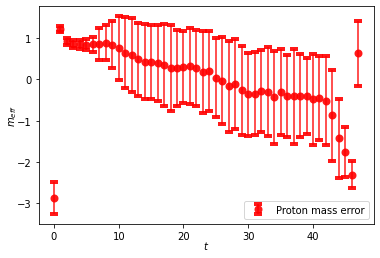

In [ ]:
import numpy as np
import gvar as gv
import h5py as h5
import matplotlib.pyplot as plt
import lsqfit

#/gf1p0_w3p0_n30_M51p3_L512_a2p00/spec/mU_0p0158_mD_0p0158_mS_0p0902/delta_pp/psq_0/

with h5.File('/content/drive/MyDrive/Colab Notebooks/a15m310L_a_avg_srcs0-0_q_avg.h5', 'r') as f: # open file
  dataFile = '/gf1p0_w3p0_n30_M51p2_L512_a2p00/spec/mU_0p0158_mD_0p0158_mS_0p0902/proton/psq_0/spin_par_avg'
  data = f[dataFile][()] #Deltapp's route
  no_complex_data = data.astype(np.float64) #change data type from complex128 to float64

##############Get Data#################
nt = np.arange(no_complex_data.shape[1]) #nt values

def Menu():     #Principal menu
    print("LQCD APP")
    print("")
    print("Principal menu")
    print("1. Visualize data from imported file.")
    print("2. Visualize values of y axis.")
    print("3. Visualize values of y axis with j displacement.")
    print("4. Visualize error for y values. ")
    print("5. Visuaize values of effective mass.")
    print("6. Visualize complete fit information through lsqfit.")
    print("7. Plot y values vs time t with error.")
    print("8. Plot values of effective mass error.")
    print("9. Save fit values.")
    print("10. Save plots.")
    print("")

def ydelta(j):
     ydelta = no_complex_data[:,:,0,0]
     ydelta_pj = np.roll(ydelta,-j,axis=1) #With j=1 for shifting the array (j must be an user input) (Modified code)
     return ydelta_pj

def effectivemass(j):
    ydelta = no_complex_data[:,:,0,0]
    ydelta_pj = np.roll(ydelta,-j,axis=1)
    meff = ( 1 / float(j)) * np.ma.log( ydelta / ydelta_pj)[:,:] #Effective mass definition Eq 6.56 Gattringer (Modified code)
    return meff

start = True
Menu()
while start == True :
    correctType = False
    while correctType == False:
        try:
            option = int(input("Select an option (1, 2, 3, ... ): "))
            correctType = True
        except ValueError:
            print("Value Error! Please type again.")
        except:
            print("Unknown error ocurred")
    if option == 1 : #1. Visualize imported data from file
        print('Values from imported data = ', no_complex_data) #data printed

    elif option == 2 : #2. Visualize values of y axis
        ydelta = no_complex_data[:,0:48,0,0] #Y values from dataFrame with nt
        print('y values = ', ydelta) #Y values printed
        print(type(ydelta))
    elif option == 3 : #3. Visualize values of axis y with a j displacement
        #ti = int(input("Select a ti for plotting (seconds): "))
        #tf = int(input("Select a tf for plotting (seconds): "))
        j = int(input("Select the displacement value: "))
        print("y values with a displacement of ", j, "are = ", ydelta(j))

    elif option == 4 : #4. Visualize error of y values
        #ti = int(input("Select a ti for plotting (seconds): "))
        #tf = int(input("Select a tf for plotting (seconds): "))
        yerr = no_complex_data[:,0:48,0,0].std(axis=0)
        print("Values of y axis error are: ", yerr)

    elif option == 5 : #5. Visualize values of effective mass
        #ti = int(input("Select a ti for plotting (seconds): "))
        #tf = int(input("Select a tf for plotting (seconds): "))
        j = int(input("Select the displacement value: "))
        effectivemass = effectivemass(j)
        print("The effective mass values are: ", effectivemass, "adimetional")

    elif option == 6 : #6. Visualize complete fit información through lsqfit
        #t will be an arrange of a quantity x of time
        #Define fit which is the equation 6.54 of the Gatringer book
        y = {                                 # data for the dependent variable
          'data1' : gv.gvar([1.376, 2.010], [[ 0.0047, 0.01], [ 0.01, 0.056]]),
          'data2' : gv.gvar([1.329, 1.582], [[ 0.0047, 0.0067], [0.0067, 0.0136]]),
          'b0/a0'   : gv.gvar(2.0, 0.5)
          }
        x = {                                 # independent variable
          'data1' : np.array([0.1, 1.0]),
          'data2' : np.array([0.1, 0.5])
          }
        p = {'a0': gv.gvar(1,0.1), 'b0':gv.gvar(1,0.1), 'a1':gv.gvar(1,0.1), 'b1':gv.gvar(1,0.1)} #Parameters dictionary which system uses to begin a search
        def fcn(t,p):                        # fit function of x and parameters p
          ans = {}
          for k in ['data1', 'data2']:

            ans[k] = p['a0']*gv.exp( - t[k] * p['b0'])+ p['a1']*gv.exp( + t[k] * p['b1'])

          ans['b0/a0'] = p['b0'] / p['a0']
          return ans

        # do the fit
        fit = lsqfit.nonlinear_fit(data=(x, y), prior=p, fcn=fcn, debug=True)
        print(fit.format(maxline=True))       # print standard summary of fit
        print(fit.p)
        p = fit.p
                                    # best-fit values for parameters
        outputs = dict(a=p['a0'], b=p['b0'])
        outputs['b0/a0'] = p['b0']/p['a0']
        inputs = dict(y=y, prior=p)
        print(gv.fmt_values(outputs))              # tabulate outputs
        print(gv.fmt_errorbudget(outputs, inputs)) # print error budget for outputs

    elif option == 7 : #7. Plot y values vs t values with error
        #ti = int(input("Select a ti for plotting (seconds): "))
        #tf = int(input("Select a tf for plotting (seconds): "))
        j = int(input("Select the displacement value (j): "))

        fig = plt.figure()
        fig, ax = plt.subplots()
        ax.errorbar(nt, no_complex_data[:,:,0,0].mean(axis=0),yerr=no_complex_data[:,:,0,0].std(axis=0), elinewidth=3, label=('Error values plot'))
        ax.set_xlabel('$t$',labelpad=-2)

        ax.set_ylabel(r'$y_{values}$',labelpad=-2)
        plt.legend()
        plt.savefig("yvst")

    elif option == 8 : #8. Plot efective mass with error
        #ti = int(input("Select a ti for plotting (seconds): "))
        #tf = int(input("Select a tf for plotting (seconds): "))
        j = int(input("Select the displacement value (j): "))
        effectivemass = effectivemass(j)
        fig = plt.figure()
        fig, ax = plt.subplots()
        ax.errorbar(nt, effectivemass.mean(axis=0), yerr=effectivemass.std(axis=0),marker='o',color= 'r',ms=4,mew=4,
            mfc='None',capsize=4,linestyle='None',alpha=0.9,label=('Proton mass error'))
        ax.set_xlabel('$t$',labelpad=-2)
        ax.set_ylabel(r'$m_{eff}$',labelpad=-2)
        plt.legend()
        plt.savefig("meffvst.png")
        #plt.savefig("meffvst.png")

    elif option == 9 : #9. Save fit
        y = {                                 # Indpendent data values
          'data1' : gv.gvar([1.376, 2.010], [[ 0.0047, 0.01], [ 0.01, 0.056]]),
          'data2' : gv.gvar([1.329, 1.582], [[ 0.0047, 0.0067], [0.0067, 0.0136]]),
          'b0/a0'   : gv.gvar(2.0, 0.5)
          }
        x = {                                 # Independent variable
          'data1' : np.array([0.1, 1.0]),
          'data2' : np.array([0.1, 0.5])
          }
        p = {'a0': gv.gvar(1,0.1), 'b0':gv.gvar(1,0.1), 'a1':gv.gvar(1,0.1), 'b1':gv.gvar(1,0.1)} #Parameters dictionary which system uses to begin a search
        def fcn(t,p):                        # fit function of x and parameters p
          ans = {}
          for k in ['data1', 'data2']:
            ans[k] = p['a0']*gv.exp( - t[k] * p['b0'])+ p['a1']*gv.exp( + t[k] * p['b1'])
          ans['b0/a0'] = p['b0'] / p['a0']
          return ans

        # do the fit
        fit = lsqfit.nonlinear_fit(data=(x, y), prior=p, fcn=fcn, debug=True)
        #print(fit.format(maxline=True))       # print standard summary of fit
        #print(fit.p)
        p = fit.p
                                    # best-fit values for parameters
        outputs = dict(a=p['a0'], b=p['b0'])
        outputs['b0/a0'] = p['b0']/p['a0']
        inputs = dict(y=y, prior=p)
        print(gv.fmt_values(outputs))              # tabulate outputs
        print(gv.fmt_errorbudget(outputs, inputs)) # print error budget for outputs

        #d1 = np.random.random(size = (1000,20))
        #d1 = lsqfit.nonlinear_fit(data=(x, y), prior=p, fcn=fcn, debug=True)
        #hf = h5.File('Datos_de_ajuste1.h5', 'w')
        #hf.create_dataset('set_de_datos_1', data=d1)
        #hf.close()

        #p['b0'] (gv.gvar).mean.sdev (importante guardar)

    elif option == 10 : #10. Save plots
      plt.savefig("temp.png",dpi=None, format='png', bbox_inches=None, pad_inches=0.1)
      plt.show(block=False)
    finish = True
    while finish == True :
      try:
        answer = input('¿Do you wish to continue? (Y/N)')
        if answer == "Y" or answer == "y" :
          start = True
          finish = False
        elif answer == "N" or answer == "n" :
          start = False
          finish = False
        else:
          print("Value Error! Please type again.")
          finish = True
      except:
          print ("Unknown Error ocurred!")
print("FINISHED")